# Rainfall in Seattle, WA vs Portland, ME

This analysis answers the question: Does it rain more in Seattle, Washington or Portland, Maine? These cities are located on opposite northern coasts of the United States, and experience some differences in precipitation patterns. These differences are best highlighted by looking at each city's average rainfall from month to month, as well as the proportion of days that receive any rainfall by month. For simplicity, only daily precipitation data (in inches) from 2018 to 2022 was used in this project, sourced from the National Centers for Environmental Information NOAA Climate Data search tool. 

Link: https://www.ncdc.noaa.gov/cdo-web/search 

### Importing All Necessary Packages for the Project

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import calendar

## Cleaning the Portland Weather Dataset
First, we are going to inspect the data to get a summary of what it contains, including any null values.

In [122]:
por_url = "https://raw.githubusercontent.com/carolinebuske/Weather/refs/heads/main/weather/data/portland_rain.csv"
por_df = pd.read_csv(por_url)

print(por_df.head())
print(por_df.info())
print(por_df.describe())
print(por_df.isnull().sum())

       STATION                     NAME        DATE  DAPR  MDPR  PRCP  SNOW  \
0  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-01   NaN   NaN  0.00   0.0   
1  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-02   NaN   NaN  0.00   0.0   
2  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-03   NaN   NaN  0.00   0.0   
3  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-04   NaN   NaN  0.00   0.0   
4  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-05   NaN   NaN  1.03  10.3   

   SNWD  
0  12.0  
1  12.0  
2  11.0  
3  11.0  
4  18.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1789 non-null   object 
 1   NAME     1789 non-null   object 
 2   DATE     1789 non-null   object 
 3   DAPR     12 non-null     float64
 4   MDPR     12 non-null     float64
 5   PRCP     1773 non-null   float64
 6   SNOW     1777 non-null   float64
 7   SNWD     153

We now know that we are dealing with 1789 entries, and 8 different columns. There are no null values in the station, name, and date columns, but there are in the rest of the columns. We are only interested in precipitation though, and only 16 entries have null values in the precipitation column (less than 1%). This is a low enough number that we can just remove them rather than imputing with the mean.

### Removing Everything We Don't Need from the Portland Data

In [123]:
por_df = por_df.drop(["DAPR","MDPR","SNOW","SNWD","STATION","NAME"],axis=1)

por_df = por_df.dropna()

por_df["PRCP"] = pd.to_numeric(por_df["PRCP"],errors="coerce")
por_bad_rows = por_df[por_df["PRCP"].isna()]
print(por_bad_rows)

por_df = por_df.drop_duplicates()

Empty DataFrame
Columns: [DATE, PRCP]
Index: []


We have dropped all unnecessary columns (we only need the date and precipitation columns). We also dropped all rows with missing precipitation values. We detected all rows that have non-numerical entries in the precipitation column (there were none). Finally, we dropped all duplicate entries.

## Cleaning the Seattle Weather Dataset
First, we are going to inspect the data to get a summary of what it contains, including any null values.

In [124]:
sea_url = "https://raw.githubusercontent.com/carolinebuske/Weather/refs/heads/main/weather/data/seattle_rain.csv"
sea_df = pd.read_csv(sea_url)

print(sea_df.head())
print(sea_df.info())
print(sea_df.describe())
print(sea_df.isnull().sum())

       STATION                    NAME    DATE  DAPR  MDPR  PRCP  SNOW  SNWD  \
0  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/1/18   NaN   NaN  0.00   NaN   NaN   
1  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/2/18   NaN   NaN  0.00   NaN   NaN   
2  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/3/18   NaN   NaN  0.00   NaN   NaN   
3  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/4/18   NaN   NaN  0.00   NaN   NaN   
4  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/5/18   NaN   NaN  0.25   NaN   NaN   

   WESD  WESF  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW   

We now know that we are dealing with 1658 entries, and 10 different columns. There are no null values in the station, name, and date columns, but there are in the rest of the columns. We are only interested in precipitation though, and there are 22 entries that have null values in the precipitation column (less than 2%). This is a low enough number that we can just remove them rather than imputing with the mean.

### Removing Everything We Don't Need from the Seattle Data

In [125]:
sea_df = sea_df.drop(["DAPR","MDPR","SNOW","SNWD","WESD","WESF","STATION","NAME"],axis=1)

sea_df = sea_df.dropna()

sea_df["PRCP"] = pd.to_numeric(sea_df["PRCP"],errors="coerce")
sea_bad_rows = sea_df[sea_df["PRCP"].isna()]
print(sea_bad_rows)

sea_df = sea_df.drop_duplicates()

Empty DataFrame
Columns: [DATE, PRCP]
Index: []


We have dropped all unnecessary columns (we only need the date and precipitation columns). We also dropped all rows with missing precipitation values. We detected all rows that have non-numerical entries in the precipitation column (there were none). Finally, we dropped all duplicate entries.

## Merging the Two Datasets and Performing Final Data Cleaning Steps

In [126]:
sea_df["DATE"] = pd.to_datetime(sea_df["DATE"], format="%m/%d/%y", errors="coerce")
por_df["DATE"] = pd.to_datetime(por_df["DATE"], errors="coerce")

por_df["city"] = "Portland, ME"
sea_df["city"] = "Seattle, WA"
weather = pd.concat([por_df, sea_df], ignore_index=True)

weather = weather.rename(columns={"PRCP":"precipitation"})
weather = weather.rename(columns={"DATE":"date"})

start_date = "2018-01-01"
end_date = "2022-12-31"
weather = weather[(weather["date"] >= start_date) & (weather["date"] <= end_date)]

Now, all of the dates in the date column are in a uniform format, and we dropped any that were outside of our desired range (2018-01-01 through 2022-12-31). We merged the Portland and Seattle datasets to make graphing easier, while adding a column that tells us what city each observation was from. We renamed the precipiation and date columns so that they are more readable as well.

## Descriptive Statistics
We are going to make a summary table of count, mean, standard deviation, percentiles, and min/max.

In [127]:
summary = weather.groupby('city')['precipitation'].describe()
print(summary.to_string())

               count      mean       std  min  25%   50%   75%   max
city                                                                
Portland, ME  1773.0  0.134219  0.341201  0.0  0.0  0.00  0.07  3.66
Seattle, WA   1636.0  0.111852  0.248635  0.0  0.0  0.01  0.11  2.60


Looking purely at mean rainfall, Portland receives 0.134 inches per day on average, and Seattle receives 0.112 inches per day on average. So, strictly considering quantity (and not distribution), it rains more in Portland than in Seattle. However, the standard deviation for rainfall in Portland is 0.341 inches, as opposed to 0.249 inches for Seattle. This tells us that while Portland may receive more total rain, the distribution of rainfall varies more than it does in Seattle. Portland has a much higher maximum rainfall value than Seattle, which could be a sign of outlier(s) in the data that are influencing our mean.

## Box Plot of Average Precipitation by Month
We are going to make a box plot that shows us the average precipitation by month, with outliers clearly visible outside the bars. This will give us an idea of how much outliers are skewing the mean.

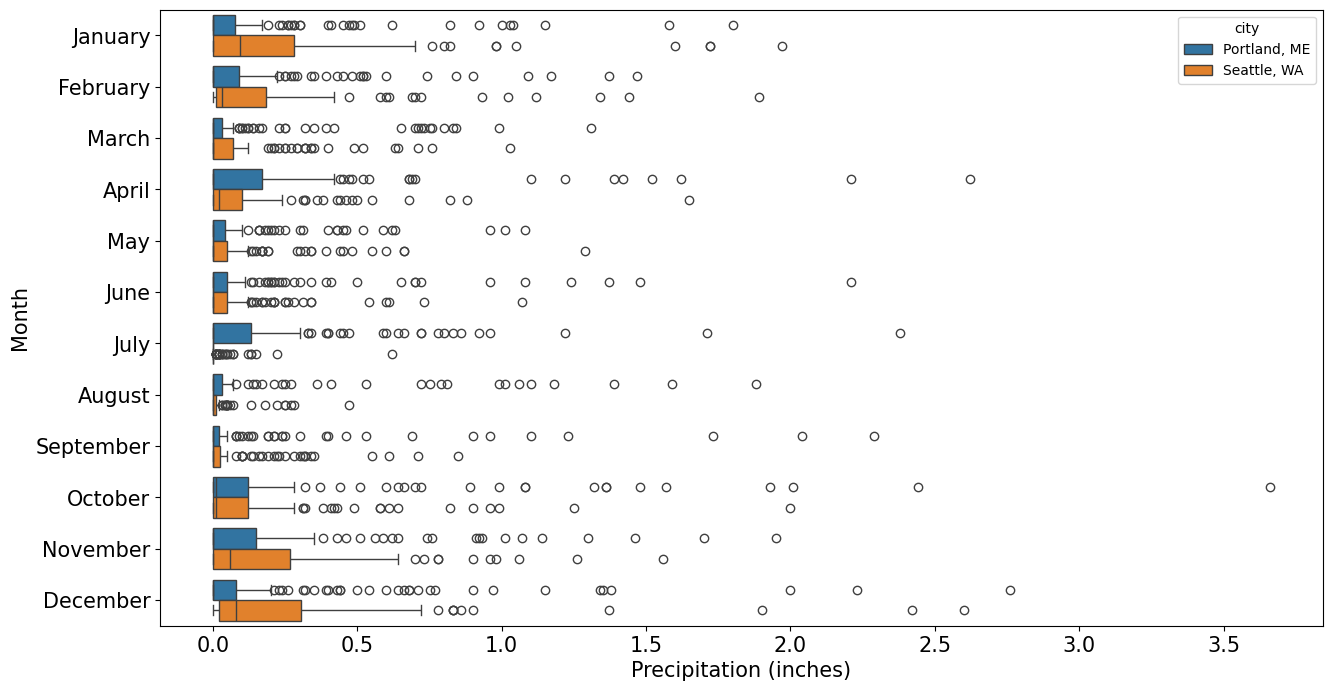

In [128]:
weather['month'] = pd.DatetimeIndex(weather['date']).month
plt.figure(figsize=(15,8))
sns.boxplot(data=weather, x='precipitation', y='month', hue='city', orient='h')
plt.xlabel('Precipitation (inches)',fontsize=15)
plt.ylabel('Month', fontsize=15)
plt.tick_params(labelsize=15)

month_names = list(calendar.month_name[1:])
plt.yticks(ticks=range(12), labels=month_names)
plt.show()

We can see in the plot above that Portland has bigger outliers in the data than Seattle, with one particularly high point in October that could be skewing the mean. When outliers are not taken into consideration, Seattle gets a lot more rain than Portland in the colder months (November through March), with Portland getting more or very similar quantities of rain to Seattle in April through October. Outliers are likely a big part of the reason Portland has higher average rainfall than Seattle.

## Bar Graph of Average Precipitation by Month
This time, we are going to make a bar graph of average precipitation by month that doesn't separate outliers. This will give us an idea of which city gets more rain per month overall.


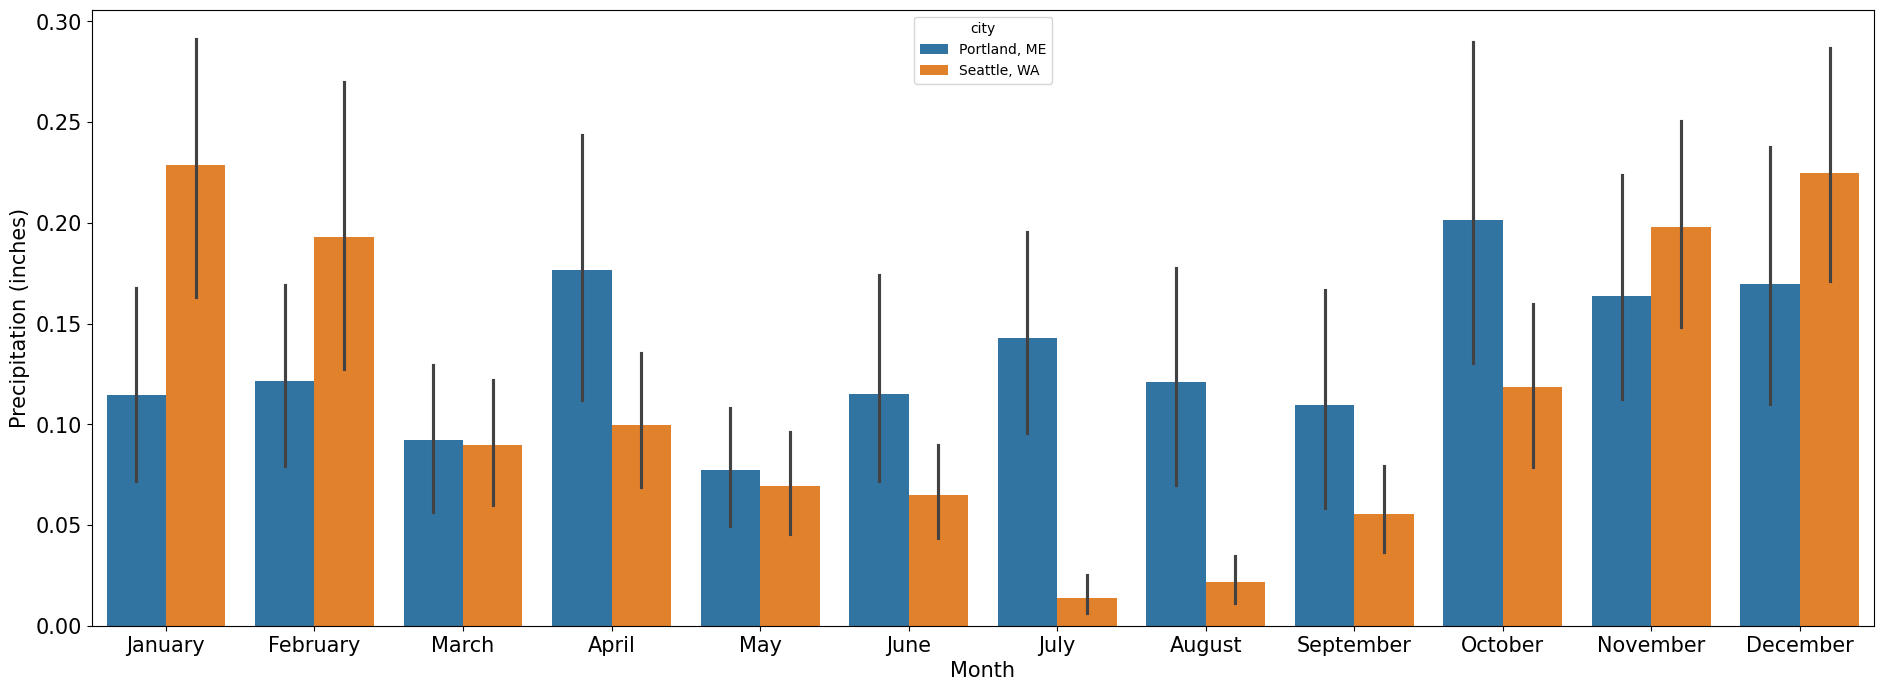

In [129]:
plt.figure(figsize=(23,8))
sns.barplot(data=weather, x='month',y='precipitation', hue='city')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)
plt.show()

In the graph above, we can see that Seattle tends to get more rainfall than Portland in the colder months (November through February), while Portland gets more in the warmer months (March through October). The lines protruding from the bars represent error, so the longer the line, the more variation in the data (and uncertainty about the true mean). In months with long error bars, there was a lot of variation in rain from day to day. Portland’s error bars are longer for most months, which matches up with the large outliers we were seeing in the boxplot.

## Bar Graph of Proportion of Days with Rain Per Month
We are going to make a bar graph that shows us the proportion of days that received precipitation per month for each city. This will give us a better idea of how rainfall is distributed on a daily basis.

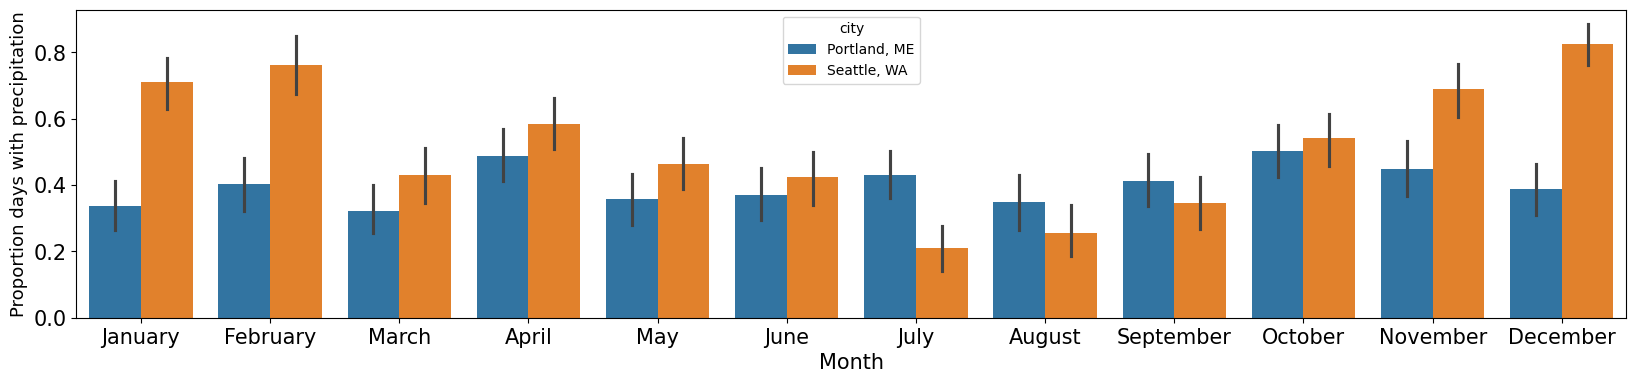

In [130]:
weather['any_precipitation'] = weather['precipitation'] > 0
plt.figure(figsize=(20,4))
sns.barplot(data=weather, x='month',y='any_precipitation', hue='city')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
plt.show()

This graph indicates that Seattle experiences a dry season in the summer months, and most its rainfall is coming from the colder months. Portland doesn't experience this pattern to the same extent (rainfall is more evenly distributed). It rains most days in Seattle from November to February, whereas Portland doesn't get that kind of daily rain. When you only consider how many days it rains, Seattle receives more rain than Portland.

## Conclusion
All things considered, the data indicates that Portland, ME gets more rainfall than Seattle, WA. However, someone living in Seattle may get the experience of near constant rain (excepting the summer months), whereas someone living in Portland may get to experience more dry days. 